In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://datosmacro.expansion.com/pib'
reqs = requests.get(url)
soup = BeautifulSoup(reqs.text, 'html.parser')

urls = []

for link in soup.find_all('a'):
 if (link.get('href')):
  if ('/pib/' in link.get('href')) and ('https' in link.get('href')):
	  print(link.get('href'))


https://datosmacro.expansion.com/pib/espana
https://datosmacro.expansion.com/pib/alemania
https://datosmacro.expansion.com/pib/uk
https://datosmacro.expansion.com/pib/francia
https://datosmacro.expansion.com/pib/italia
https://datosmacro.expansion.com/pib/portugal
https://datosmacro.expansion.com/pib/zona-euro
https://datosmacro.expansion.com/pib/usa
https://datosmacro.expansion.com/pib/japon
https://datosmacro.expansion.com/pib/china
https://datosmacro.expansion.com/pib/china
https://datosmacro.expansion.com/pib/china
https://datosmacro.expansion.com/pib/andorra
https://datosmacro.expansion.com/pib/andorra
https://datosmacro.expansion.com/pib/emiratos-arabes-unidos
https://datosmacro.expansion.com/pib/afganistan
https://datosmacro.expansion.com/pib/antigua-barbuda
https://datosmacro.expansion.com/pib/albania
https://datosmacro.expansion.com/pib/albania
https://datosmacro.expansion.com/pib/armenia
https://datosmacro.expansion.com/pib/angola
https://datosmacro.expansion.com/pib/argentin

In [ ]:
import pandas as pd
data=pd.read_html('https://datosmacro.expansion.com/pib/espana')
data[len(data)-2]

,Fecha,PIB anual,PIB anual.1,Var. PIB (%)
0,2023,1.461.889 M€,1.580.741 M$,"2,5%"
1,2022,1.346.377 M€,1.418.920 M$,"5,8%"
2,2021,1.222.290 M€,1.426.224 M$,"6,4%"
3,2020,1.119.010 M€,1.280.459 M$,"-11,2%"
4,2019,1.245.513 M€,1.393.200 M$,"2,0%"
...,...,...,...,...
59,1964,NaN,21.344 M$,"5,3%"
60,1963,NaN,19.075 M$,"9,6%"
61,1962,NaN,16.139 M$,"10,0%"
62,1961,NaN,13.834 M$,"11,8%"


In [ ]:
data[len(data)-2].dtypes

Fecha            int64
PIB anual       object
PIB anual.1     object
Var. PIB (%)    object
dtype: object

In [ ]:
newdata = data[len(data)-2].replace(to_replace = [' M€'], value = [' '])

In [ ]:
newdata.columns

Index(['Fecha', 'PIB anual', 'PIB anual.1', 'Var. PIB (%)'], dtype='object')

In [ ]:
newdata[['PIB anual']] =  newdata[['PIB anual']].astype("string")

In [ ]:
newdata.dtypes

Fecha                    int64
PIB anual       string[python]
PIB anual.1             object
Var. PIB (%)            object
dtype: object

In [ ]:
newdata['PIB anual'] = newdata['PIB anual'].str.replace("M€", " ")

In [ ]:
newdata

,Fecha,PIB anual,PIB anual.1,Var. PIB (%)
0,2023,1.461.889,1.580.741 M$,"2,5%"
1,2022,1.346.377,1.418.920 M$,"5,8%"
2,2021,1.222.290,1.426.224 M$,"6,4%"
3,2020,1.119.010,1.280.459 M$,"-11,2%"
4,2019,1.245.513,1.393.200 M$,"2,0%"
...,...,...,...,...
59,1964,<NA>,21.344 M$,"5,3%"
60,1963,<NA>,19.075 M$,"9,6%"
61,1962,<NA>,16.139 M$,"10,0%"
62,1961,<NA>,13.834 M$,"11,8%"


In [ ]:
# Eliminar caracteres no numéricos y convertir a número
newdata['PIB anual'] = newdata['PIB anual'].replace(r'[^0-9]', '', regex=True).astype(float)

newdata

,PIB anual,PIB anual.1,Var. PIB (%),Country
Fecha,,,,
2023,265503.0,287.088 M$,"2,3%",portugal
2022,242341.0,252.130 M$,"6,8%",portugal
2021,216053.0,250.055 M$,"5,7%",portugal
2020,200519.0,228.356 M$,"-8,3%",portugal
2019,214375.0,240.013 M$,"2,7%",portugal
...,...,...,...,...
1964,631.0,4.236 M$,"6,6%",portugal
1963,582.0,3.906 M$,"5,9%",portugal
1962,536.0,3.668 M$,"6,7%",portugal


<Axes: xlabel='Fecha', ylabel='PIB anual'>

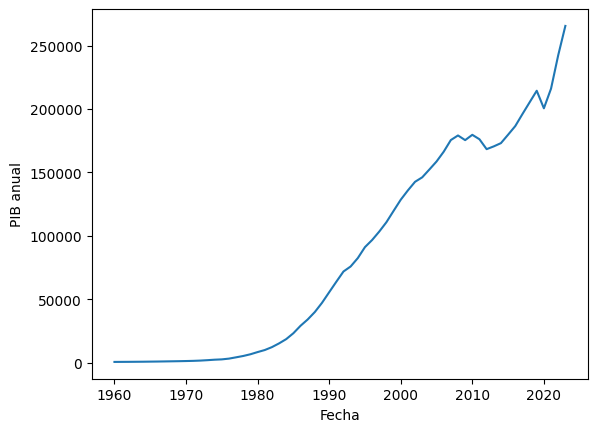

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x='Fecha',y='PIB anual',data=newdata)

6
       PIB anual   PIB anual.1 Var. PIB (%)   Country
Fecha                                                
2023   1461889.0  1.580.741 M$         2,5%    espana
2022   1346377.0  1.418.920 M$         5,8%    espana
2021   1222290.0  1.426.224 M$         6,4%    espana
2020   1119010.0  1.280.459 M$       -11,2%    espana
2019   1245513.0  1.393.200 M$         2,0%    espana
...          ...           ...          ...       ...
1964       631.0      4.236 M$         6,6%  portugal
1963       582.0      3.906 M$         5,9%  portugal
1962       536.0      3.668 M$         6,7%  portugal
1961       504.0      3.418 M$         5,5%  portugal
1960       468.0      3.193 M$          NaN  portugal

[404 rows x 4 columns]
Index(['Fecha', 'PIB anual', 'PIB anual.1', 'Var. PIB (%)', 'Country'], dtype='object')


[Text(0.5, 1.0, 'PIB for different countries'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Rate')]

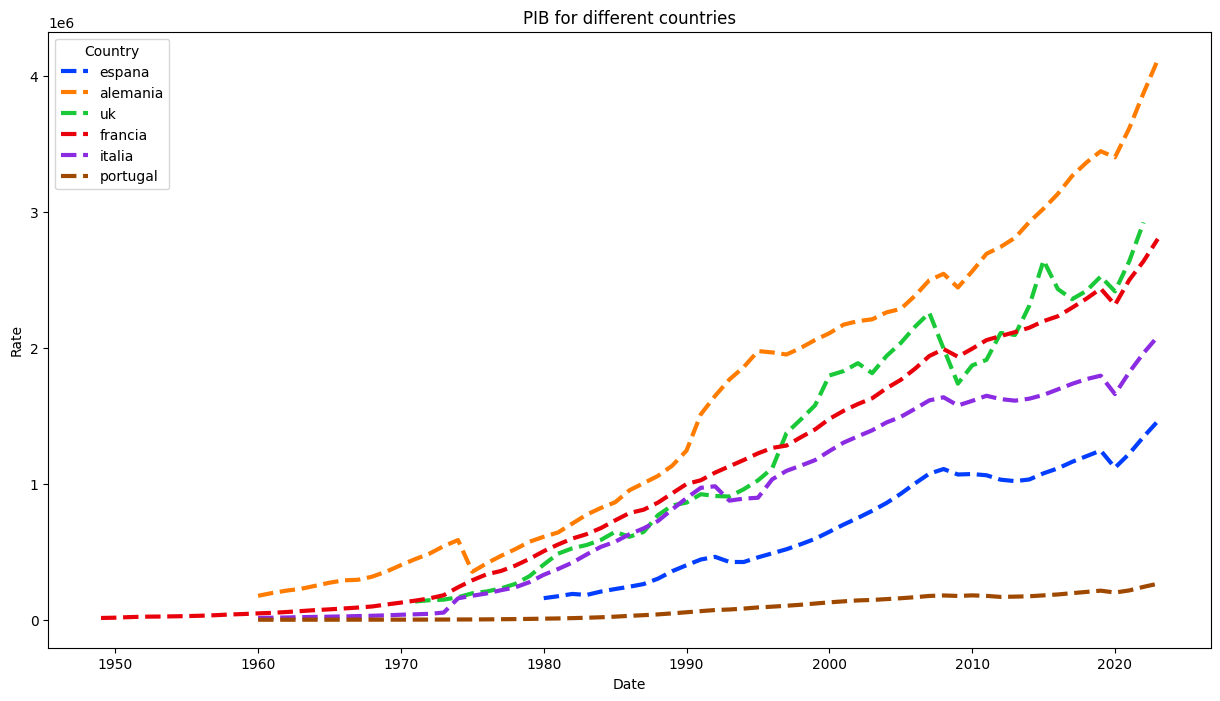

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

url = 'https://datosmacro.expansion.com/pib'
reqs = requests.get(url)
soup = BeautifulSoup(reqs.text, 'html.parser')

urls = []

listdata=[]
countries=[]
var=0
for link in soup.find_all('a'):
  if (link.get('href')):
    if ('/pib/' in link.get('href')) and ('https' in link.get('href')):
      #print(link.get('href'))
      if link.get('href').split('/')[-1] not in countries:
        countries.append(link.get('href').split('/')[-1])
        data=pd.read_html(link.get('href'))
        newdata = data[len(data)-2].replace(to_replace = [' M€'], value = [' '])
        #newdata[['PIB anual']] =  data[['PIB anual']].astype("string")
        newdata['PIB anual'] = newdata['PIB anual'].replace(r'[^0-9]', '', regex=True).astype(float)
        newdata = newdata.set_index('Fecha')
        newdata['Country']=link.get('href').split('/')[-1]
        #print(newdata)
        #df = pd.concat([df1, df2], ignore_index=True)
        #print(newdata)
        listdata.append(newdata)
        # plot df
        # g = sns.relplot(data=df, x='x', y='y1', kind='line', hue='type', palette=['red', 'blue'])
        # palette = sns.color_palette("mako_r", 6)
        #sns.lineplot(x='Fecha',y='PIB anual',data=newdata, palette=palette)

        var=var+1
        if (var==6):
          break

print(len(listdata))
plt.figure(figsize=(15,8))


df = pd.concat(listdata)
print(df)
df=df.reset_index()
print(df.columns)
palette = sns.color_palette("bright",6)

sns.lineplot(x='Fecha',y='PIB anual',hue='Country',linestyle='dashed', linewidth=3,data=df, palette=palette).set(title='PIB for different countries', xlabel='Date', ylabel='Rate')



In [ ]:
print(listdata)

[       PIB anual   PIB anual.1 Var. PIB (%) Country
Fecha                                              
2023   1461889.0  1.580.741 M$         2,5%  espana
2022   1346377.0  1.418.920 M$         5,8%  espana
2021   1222290.0  1.426.224 M$         6,4%  espana
2020   1119010.0  1.280.459 M$       -11,2%  espana
2019   1245513.0  1.393.200 M$         2,0%  espana
...          ...           ...          ...     ...
1964         NaN     21.344 M$         5,3%  espana
1963         NaN     19.075 M$         9,6%  espana
1962         NaN     16.139 M$        10,0%  espana
1961         NaN     13.834 M$        11,8%  espana
1960         NaN     12.072 M$          NaN  espana

[64 rows x 4 columns],        PIB anual   PIB anual.1 Var. PIB (%)   Country
Fecha                                                
2023   4122210.0  4.456.210 M$        -0,2%  alemania
2022   3876810.0  4.085.680 M$         1,8%  alemania
2021   3617450.0  4.262.767 M$         3,2%  alemania
2020   3403730.0  3.886.555 M

In [ ]:
print(type(listdata[0]))

<class 'pandas.core.frame.DataFrame'>
